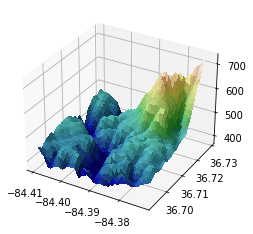

In [1]:
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt
import numpy as np

# Load and format data
dem = cbook.get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
nrows, ncols = z.shape
x = np.linspace(dem['xmin'], dem['xmax'], ncols)
y = np.linspace(dem['ymin'], dem['ymax'], nrows)
x, y = np.meshgrid(x, y)

region = np.s_[5:50, 5:50]
x, y, z = x[region], y[region], z[region]

# Set up plot
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(z, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False)

plt.show()

In [5]:
import pandas as pd

x = pd.read_csv('test.csv')

In [13]:
x[['lat','lon','cVeg']]

,lat,lon,cVeg
0,43.821991,-80.00,9.246442
1,43.821991,-65.00,9.643990
2,44.764397,-81.25,6.318393
3,44.764397,-80.00,17.194760
4,44.764397,-78.75,20.539728
...,...,...,...
14827,65.497383,-118.75,1.067482
14828,66.439789,-130.00,13.550810
14829,66.439789,-128.75,10.701132
14830,66.439789,-127.50,7.008280


In [20]:
x['cVeg'].to_numpy().reshape(len(x['lat'].unique()),len(x['lon'].unique()))

ValueError: cannot reshape array of size 14832 into shape (23,69)

/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_82580/2931745840.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


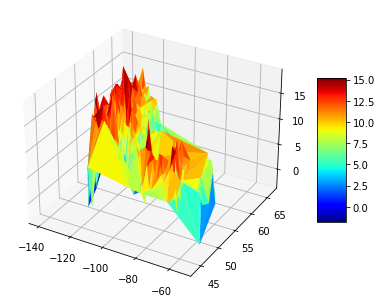

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
# x,y,z = np.loadtxt('your_file', unpack=True)

fig = plt.figure()
ax = Axes3D(fig)
surf = ax.plot_trisurf(x['lon'], x['lat'], x['cVeg'], cmap=cm.jet, linewidth=0.01)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib